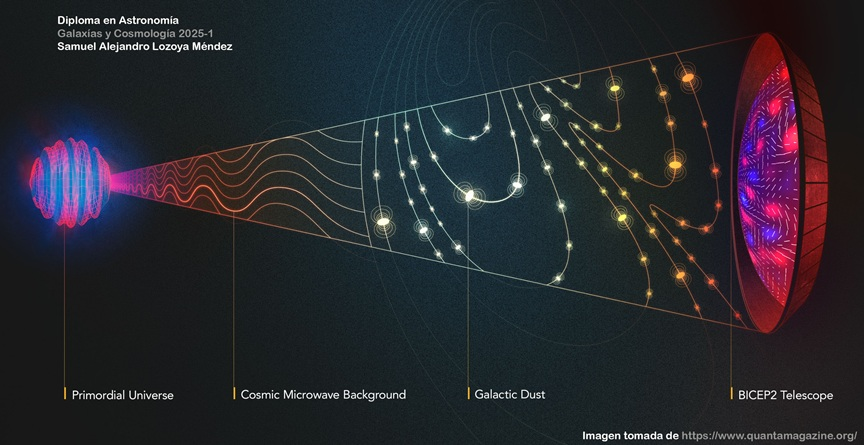

<a target="_blank" href="https://colab.research.google/github.com/Kha0tiko/astronomy/blob/main/Reto5_Samuel_Lozoya.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## Reto ñoño 5 - Midiendo la fracción de energía oscura en el universo con supernovas

### Datos de entrada


In [1028]:
# Librerías a usar
import openpyxl, math
from scipy.integrate import quad
from tabulate import tabulate
import matplotlib.pyplot as plt

# Importar base de datos desde el archivo .xlsx
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
path='/content/drive/MyDrive/Colab Notebooks/Datos-SCPUnion2_DL_vs_z.xlsx'
excel_sheet = openpyxl.load_workbook(path)
database = excel_sheet.active

# Ciclo para iterar los valores de la tabla y tener acceso a ellos en cálculos posteriores
tabla = []
for row in range(1,database.max_row):
    lista = [row,]
    for col in database.iter_cols(1,database.max_column):
        lista.append(col[row].value)
    tabla.append(lista)

Mounted at /content/drive


### Definiciones

In [1029]:
# Creación de listas
zs = []
distancias_luminosidad = []
distancias_calculadas = []
errores = []
limites_superior = []
limites_inferior = []
suma_dispersiones = 0

zs_filtrado = []
limites_superior_filtrado = []
limites_inferior_filtrado = []
distancias_calculadas_filtrado = []
suma_dispersiones_filtrada = 0

#Parámetro A
A = 0.72

# Parámetro de aceleración
DH = 14000 # Millones de años luz

### Funciones

In [1030]:
# Integral
def integrand(x):
	return 1/(math.sqrt((1-A)*((1+x)**3)+A))

# Ciclo para calcular y llenar las diferentes listas
for row in range(0,database.max_row-1):
    # Cálculo de la distancia por luminosidad con la integral
    z = tabla[row][2]
    d_luminosidad = tabla[row][3]
    error = tabla[row][4]
    I, err = quad(integrand, 0, z)
    d_integral = (1+z)*DH*I
    suma = d_luminosidad + error
    resta = d_luminosidad - error
    distancias_calculadas.append(d_integral)
    tabla[row].append(d_integral)
    limites_superior.append(suma)
    tabla[row].append(suma)
    limites_inferior.append(resta)
    tabla[row].append(resta)

    # Agregando valores de z, distancia por Luminosidad y error a sus respectivos arreglos
    zs.append(z)
    distancias_luminosidad.append(d_luminosidad)
    errores.append(error)

    # Cálculo de diferenia entre Distancia comóvil y distancia calculada, y su suma
    w = abs(d_luminosidad-d_integral)
    suma_dispersiones += w

    #Filtrar los datos por porcentaje de error
    if (error / d_luminosidad) < 0.1:
        zs_filtrado.append(z)
        limites_superior_filtrado.append(suma)
        limites_inferior_filtrado.append(resta)
        distancias_calculadas_filtrado.append(d_integral)
        o = abs(d_luminosidad-d_integral)
        suma_dispersiones_filtrada += o

tabla_filtrada = list(zip(zs_filtrado, limites_superior_filtrado, limites_inferior_filtrado,distancias_calculadas_filtrado))

# Re-ordenar tabla de acuerdo al valor de z
nueva_tabla = sorted(tabla, key=lambda x: x[2])
zs = [sublista[2] for sublista in nueva_tabla]
distancias_luminosidad = [sublista[3] for sublista in nueva_tabla]
errores = [sublista[4] for sublista in nueva_tabla]
distancias_calculadas = [sublista[5] for sublista in nueva_tabla]
limites_superior = [sublista[6] for sublista in nueva_tabla]
limites_inferior = [sublista[7] for sublista in nueva_tabla]

# Re-ordenar tabla filtrada de acuerdo al valor de z
nueva_tabla_filtrada = sorted(tabla_filtrada, key=lambda x: x[0])
zs_filtrado = [sublista[0] for sublista in nueva_tabla_filtrada]
limites_superior_filtrado = [sublista[1] for sublista in nueva_tabla_filtrada]
limites_inferior_filtrado = [sublista[2] for sublista in nueva_tabla_filtrada]
distancias_calculadas_filtrado = [sublista[3] for sublista in nueva_tabla_filtrada]

### Resultados

 #### z vs. Distancia por Luminosidad con función fill_between

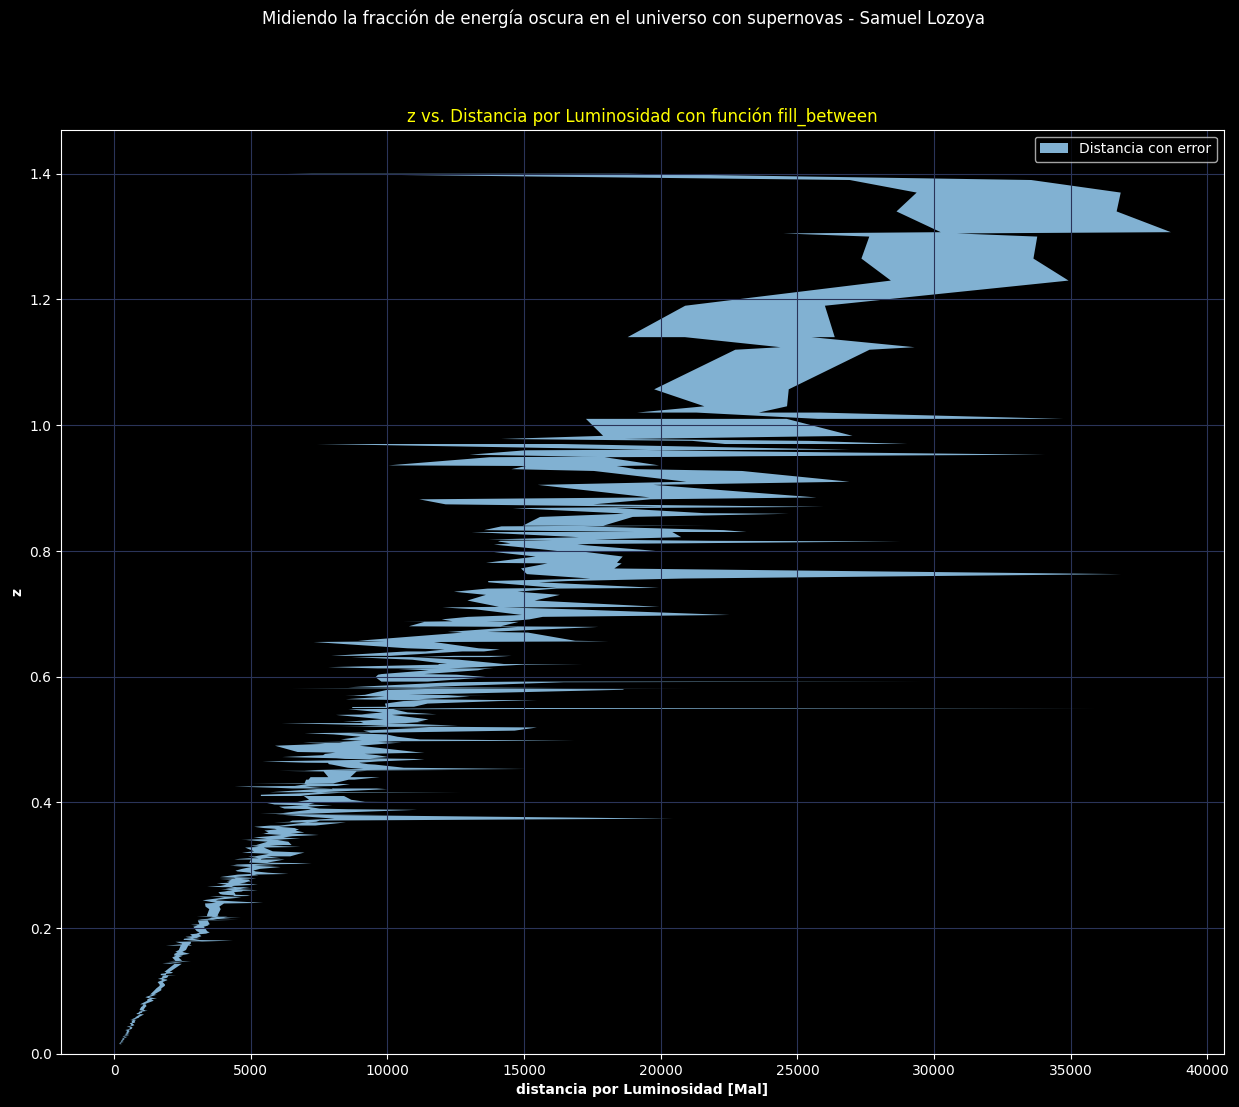

In [1031]:
# Configuración de gráfica
plt.style.use("dark_background")
fig, ax = plt.subplots(figsize=(15,12))
ax.grid(color='#2A3459')
plt.suptitle("Midiendo la fracción de energía oscura en el universo con supernovas - Samuel Lozoya")
plt.title("z vs. Distancia por Luminosidad con función fill_between", color = "yellow")
plt.bar(zs_filtrado, width=0.4, height= 0, label='Distancia con error', color = 'C4')
plt.xlabel('distancia por Luminosidad [Mal]', fontweight='bold')
plt.ylabel('z', fontweight='bold')
plt.fill_betweenx(zs,limites_superior, limites_inferior, fc = 'C4')
plt.legend()
plt.show()

 #### z vs. Distancia por Luminosidad con barras de error

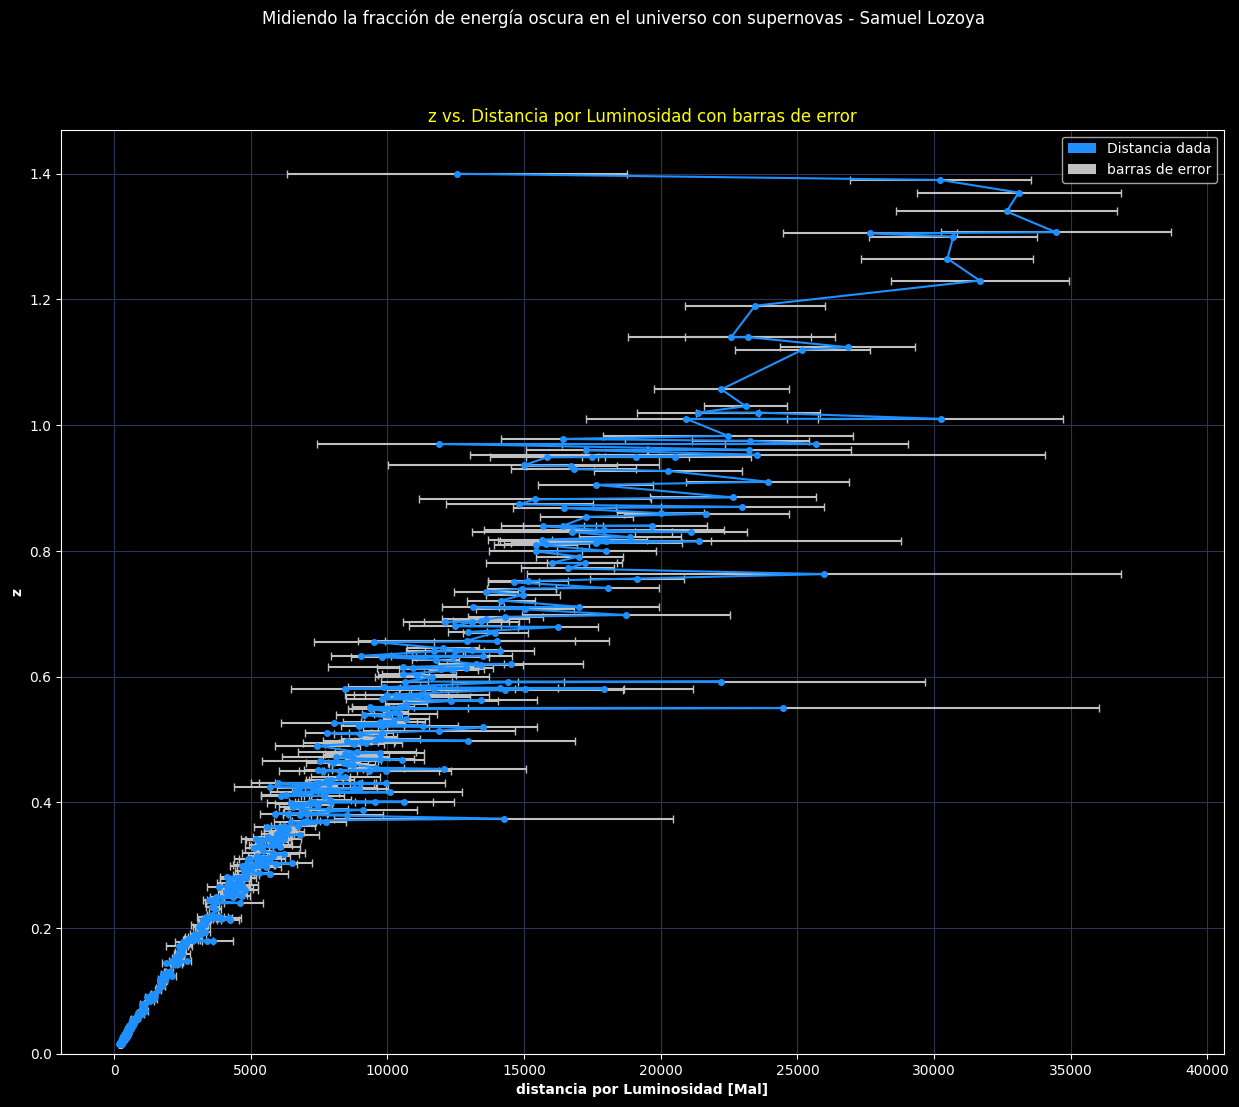

In [1032]:
# Configuración de gráfica
plt.style.use("dark_background")
fig, ax = plt.subplots(figsize=(15,12))
ax.grid(color='#2A3459')
plt.suptitle("Midiendo la fracción de energía oscura en el universo con supernovas - Samuel Lozoya")
plt.title("z vs. Distancia por Luminosidad con barras de error", color = "yellow")
plt.bar(distancias_luminosidad, width=0.4, height= 0, label='Distancia dada', color = "dodgerblue")
plt.bar(zs, width=0.4, height= 0,  label='barras de error', color = "silver")
plt.xlabel('distancia por Luminosidad [Mal]', fontweight='bold')
plt.ylabel('z', fontweight='bold')
ax.errorbar(distancias_luminosidad, zs, marker = "o", markersize = 4, capsize=3, color = "dodgerblue",xerr = errores,  ecolor="silver")
plt.legend()
plt.show()

#### z vs. Distancia calculada con Integral

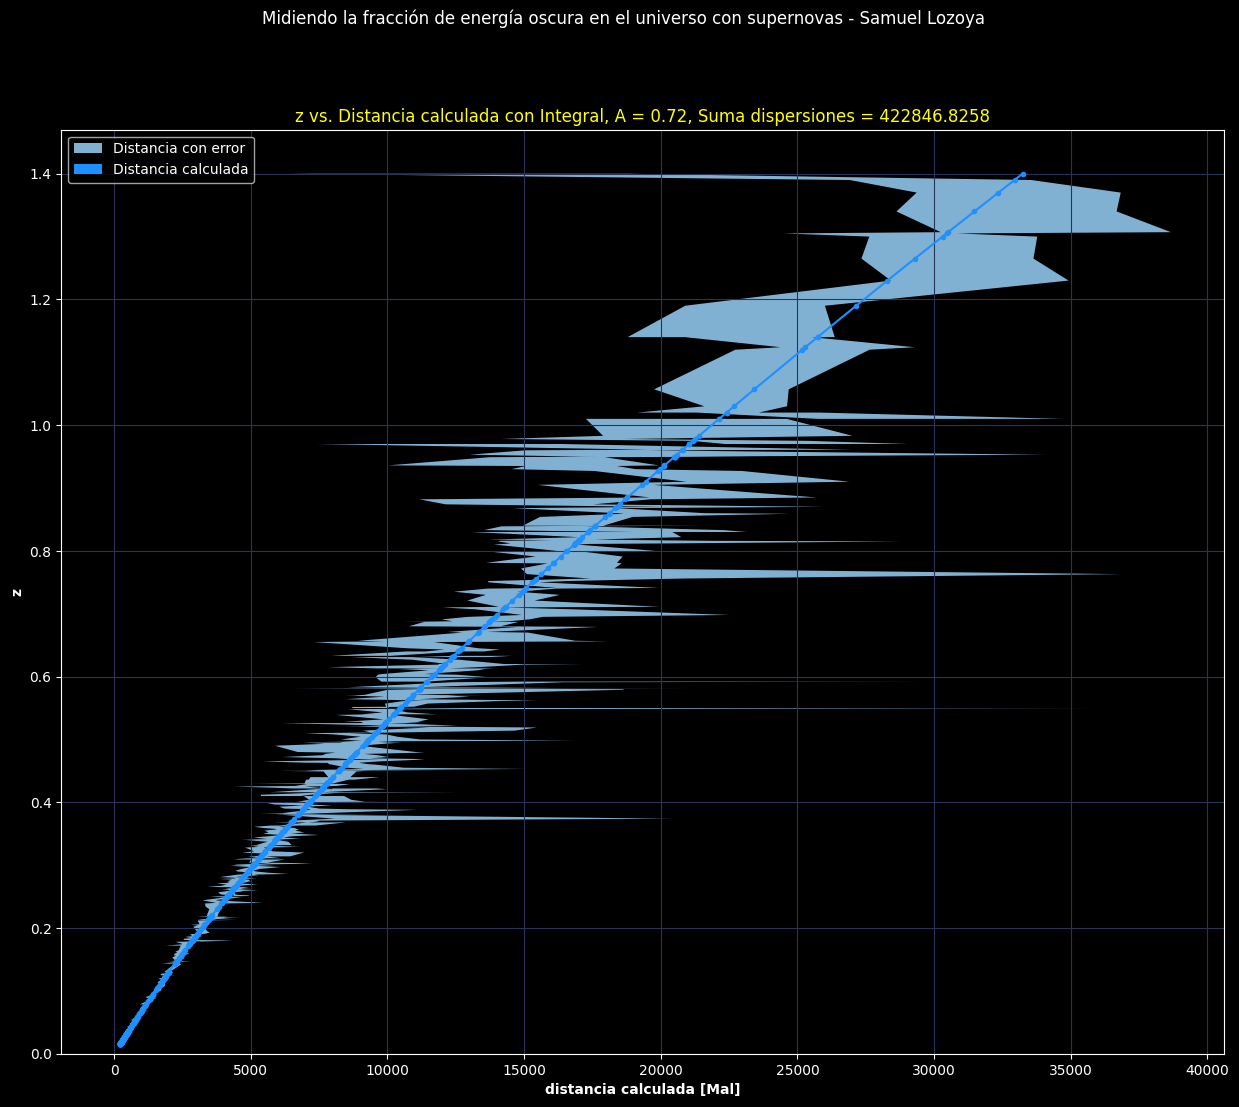

In [1033]:
# Configuración de gráfica
plt.style.use("dark_background")
fig, ax = plt.subplots(figsize=(15,12))
ax.grid(color='#2A3459')
plt.suptitle("Midiendo la fracción de energía oscura en el universo con supernovas - Samuel Lozoya")
plt.title("z vs. Distancia calculada con Integral, A = "+ str(A) + ", Suma dispersiones = " + str("{0:.4f}".format(suma_dispersiones)), color = "yellow")
plt.bar(zs_filtrado, width=0.4, height= 0, label='Distancia con error', color = 'C4')
plt.bar(distancias_calculadas_filtrado, width=0.4, height= 0,  label='Distancia calculada', color ="dodgerblue")
plt.xlabel('distancia calculada [Mal]', fontweight='bold')
plt.ylabel('z', fontweight='bold')
ax.plot(distancias_calculadas, zs, marker = "o", markersize = 3, color ="dodgerblue")

plt.fill_betweenx(zs,limites_superior, limites_inferior, fc = 'C4')
plt.legend()
plt.show()

#### z vs. Distancia calculada filtrando por error < 10%

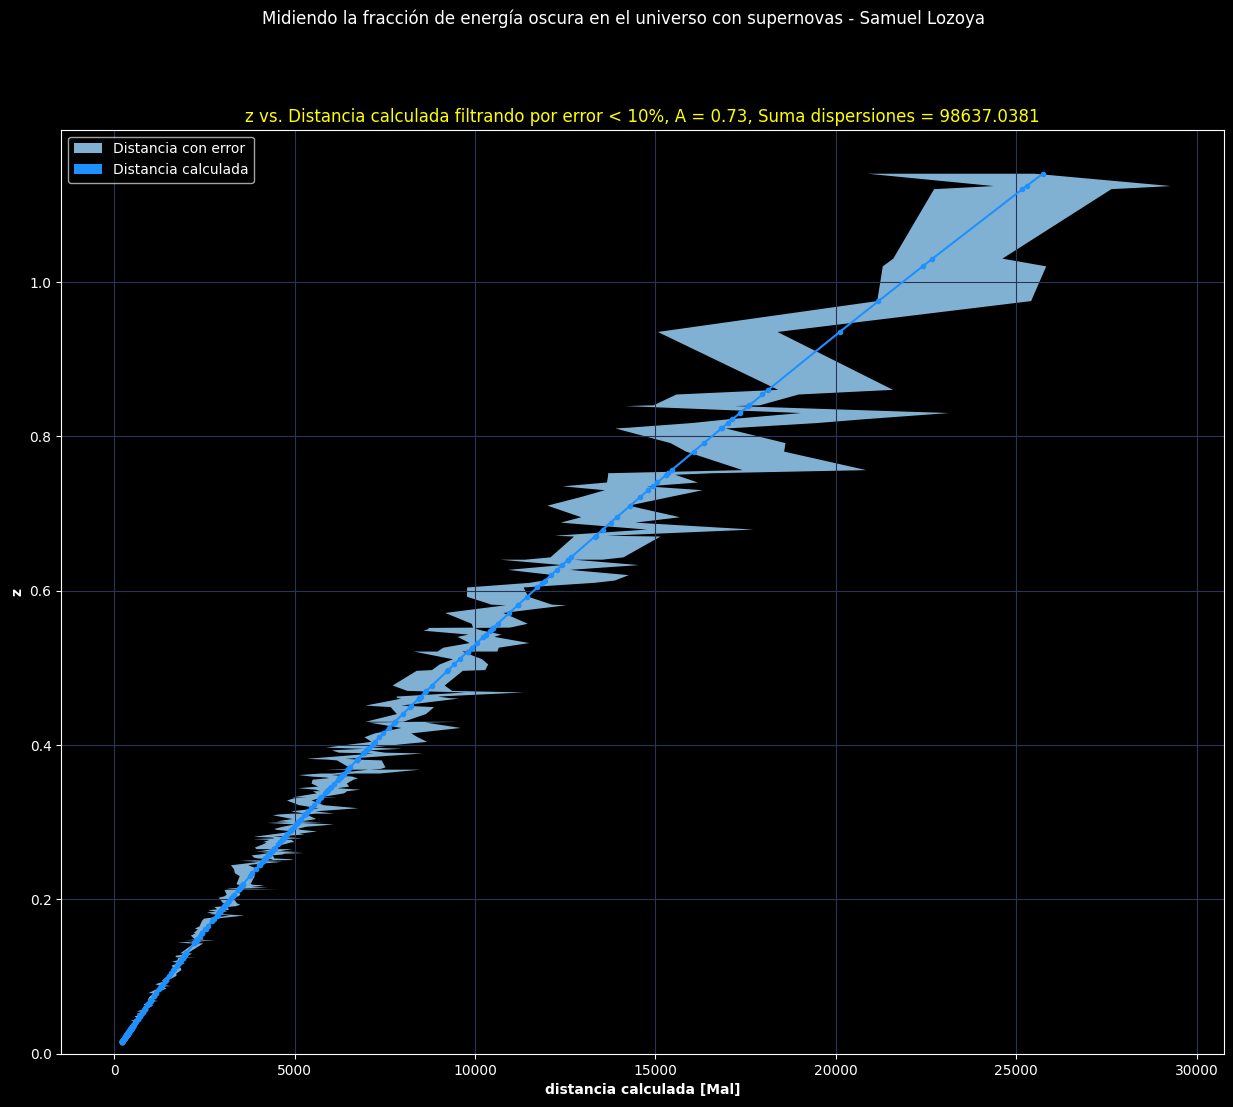

In [1034]:
# Nuevo valor para A
A = 0.73

# Configuración de gráfica
plt.style.use("dark_background")
fig, ax = plt.subplots(figsize=(15,12))
ax.grid(color='#2A3459')
plt.suptitle("Midiendo la fracción de energía oscura en el universo con supernovas - Samuel Lozoya")
plt.title("z vs. Distancia calculada filtrando por error < 10%, A = "+ str(A) + ", Suma dispersiones = " + str("{0:.4f}".format(suma_dispersiones_filtrada)), color = "yellow")
plt.bar(zs_filtrado, width=0.4, height= 0, label='Distancia con error', color = 'C4')
plt.bar(distancias_calculadas_filtrado, width=0.4, height= 0,  label='Distancia calculada', color ="dodgerblue")
plt.xlabel('distancia calculada [Mal]', fontweight='bold')
plt.ylabel('z', fontweight='bold')
ax.plot(distancias_calculadas_filtrado, zs_filtrado, marker = "o", markersize = 3, color ="dodgerblue")
plt.fill_betweenx(zs_filtrado,limites_superior_filtrado,limites_inferior_filtrado, fc = 'C4')
plt.legend()
plt.show()